### Ecommerce Text Classification

***

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'ecommerceDataset.csv'

In [2]:
df = pd.read_csv('ecommerceDataset.csv', header = None)

In [3]:
df = df.sample(frac = 1)

In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
df = df[0:1000]

In [6]:
df.head()

,0,1
0,Household,Trance Home Linen 100% Cotton 210 Tc Queen Dou...
1,Clothing & Accessories,Momin Libas Pleated Neck Abaya Navy Blue color...
2,Books,Copy Colour: Fruits (Copy Colour Books)
3,Electronics,"Blaupunkt San Marino 330 6.2 inch Touchscreen,..."
4,Electronics,"Rolltop Desktop Computer CPU, Intel CORE 2 Duo..."


### Check info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Check for missing values

In [8]:
df.isna().sum()

0    0
1    0
dtype: int64

### Drop missing rows

In [9]:
df.dropna(inplace = True)

### Print some of the text along with its Label

In [10]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- Trance Home Linen 100% Cotton 210 Tc Queen Double Fitted Bedsheet with 2 Pillow Covers (Dark Blue, 78 x 60 inches) Color Name:dark blue   Ease your daily chores by using Trance fitted bedsheet. The bedsheet has 10/12 inch skirt that will help you tuck in mattresses upto 8" inches deep. It includes a queen bed sheet and two pillow covers crafted from pure cotton.

Clothing & Accessories -- Momin Libas Pleated Neck Abaya Navy Blue color. Made of Kashibo fabric. Exclusive of the prices of Hijab/ Scarf and Cap

Books -- Copy Colour: Fruits (Copy Colour Books) 

Electronics -- Blaupunkt San Marino 330 6.2 inch Touchscreen, Bluetooth Car Multimedia Player (2 DIN) High grade tuner, FM band, Radio Data System (AF, CT, EON, PS, PTY, TA, TP, RT), AM band, Travelstore, 6.2” digital touch screen TFT, 800 x 480 pixels, Built-in, Bluetooth, Profiles: HFP, PBAP, A2DP, Built-in microphone, External microphone included, Audio, video, picture playback from USB/microSDHC.

Electronics -- Rol

### Create a function to preprocess the text

In [11]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [12]:
df[1] = df[1].apply(preprocess)

### Print some of the texts after the applying the function

In [13]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- trance home linen 100 cotton 210 tc queen double fitted bedsheet with 2 pillow cover dark blue 78 x 60 inch color name dark blue ease your daily chore by using trance fitted bedsheet the bedsheet ha 10 12 inch skirt that will help you tuck in mattress upto 8 inch deep it includes a queen bed sheet and two pillow cover crafted from pure cotton

Clothing & Accessories -- momin libas pleated neck abaya navy blue color made of kashibo fabric exclusive of the price of hijab scarf and cap

Books -- copy colour fruit copy colour book

Electronics -- blaupunkt san marino 330 6 2 inch touchscreen bluetooth car multimedia player 2 din high grade tuner fm band radio data system af ct eon p pty ta tp rt am band travelstore 6 2 digital touch screen tft 800 x 480 pixel built in bluetooth profile hfp pbap a2dp built in microphone external microphone included audio video picture playback from usb microsdhc

Electronics -- rolltop desktop computer cpu intel core 2 duo 2 9 ghz processor g 3

### Check for imbalance in the dataset

<Axes: ylabel='count'>

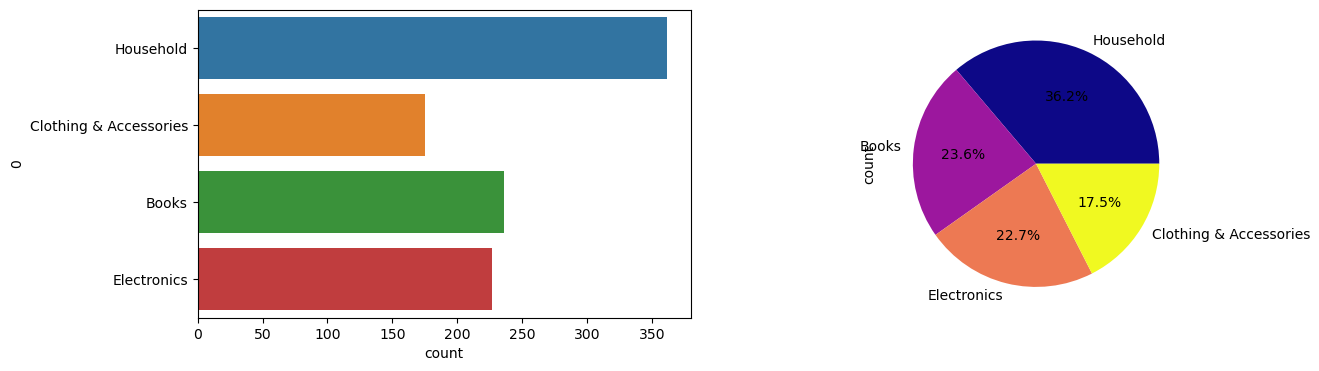

In [14]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df[0])
plt.subplot(1,2,2)
df[0].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

### Split the dataset into Input & Target Variables

In [15]:
X = df[1]

In [16]:
y = df[0]

### Label Encode our Target Variables

In [17]:
y = y.map({'Household':0,'Books':1, 'Clothing & Accessories':2, 'Electronics':3})

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

X = text_encoding(X)

### Split the dataset into Training & Testing set

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential model with Bidirectional LSTM layers

In [20]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation = 'sigmoid'))

### Compile the model

In [21]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [22]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 22s 591ms/step - loss: 1.3479 - accuracy: 0.3605 - val_loss: 1.2771 - val_accuracy: 0.3750
Epoch 2/10
24/24 [==============================] - 11s 457ms/step - loss: 1.0228 - accuracy: 0.5684 - val_loss: 0.7308 - val_accuracy: 0.7750
Epoch 3/10
24/24 [==============================] - 11s 458ms/step - loss: 0.5851 - accuracy: 0.7842 - val_loss: 0.7680 - val_accuracy: 0.7250
Epoch 4/10
24/24 [==============================] - 12s 484ms/step - loss: 0.2414 - accuracy: 0.9211 - val_loss: 0.6688 - val_accuracy: 0.8000
Epoch 5/10
24/24 [==============================] - 11s 464ms/step - loss: 0.0679 - accuracy: 0.9855 - val_loss: 1.1159 - val_accuracy: 0.6750
Epoch 6/10
24/24 [==============================] - 11s 460ms/step - loss: 0.0470 - accuracy: 0.9868 - val_loss: 0.5588 - val_accuracy: 0.8250
Epoch 7/10
24/24 [==============================] - 11s 447ms/step - loss: 0.0223 - accuracy: 0.9961 - val_loss: 0.5746 - val_accuracy: 0.8750

### Make predictions with X_test

In [23]:
y_pred = model.predict(X_test)

7/7 [==============================] - 2s 133ms/step


### Fetch the index of the higher probable prediction

In [24]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [25]:
accuracy_score(y_test,y_pred)

0.88

### Confusion matrix

<Axes: >

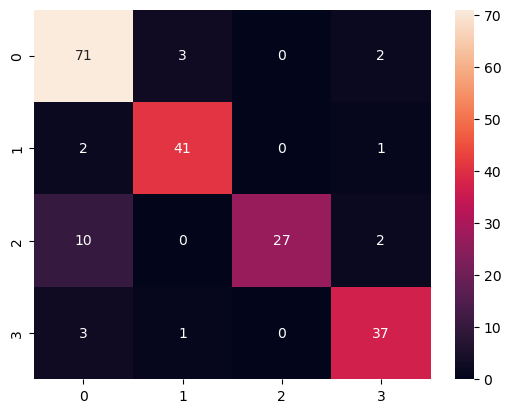

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        76
           1       0.91      0.93      0.92        44
           2       1.00      0.69      0.82        39
           3       0.88      0.90      0.89        41

    accuracy                           0.88       200
   macro avg       0.90      0.87      0.88       200
weighted avg       0.89      0.88      0.88       200



***